In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# File path
file_path = "./evaluate_best_model/evaluation_log.json"

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)


In [3]:
# Extract data
confusion_matrix = np.array(data["confusion_matrix"])
normalized_confusion_matrix = np.array(data["normalized_confusion_matrix"])
classification_report = data["classification_report"]
accuracy = data["accuracy"]
per_class_accuracy = data["per_class_accuracy"]
misclassified_samples = data["misclassified_samples"]

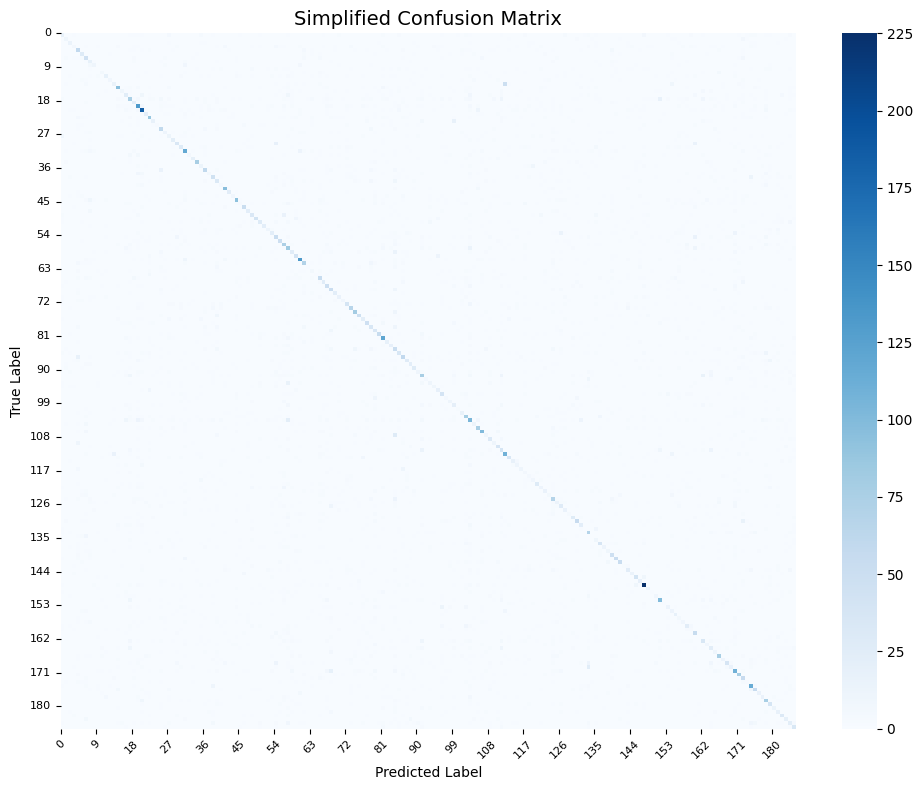

In [6]:
# Simplified Confusion Matrix Visualization
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.heatmap(confusion_matrix, annot=False, cmap='Blues', cbar=True)

# Show fewer labels on axes (every 10th label, for example)
num_classes = confusion_matrix.shape[0]
ticks = range(0, num_classes, max(1, num_classes // 20))  # Adjust frequency based on matrix size
plt.xticks(ticks, ticks, rotation=45, fontsize=8)  # Smaller font size for clarity
plt.yticks(ticks, ticks, fontsize=8)

plt.title("Simplified Confusion Matrix", fontsize=14)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


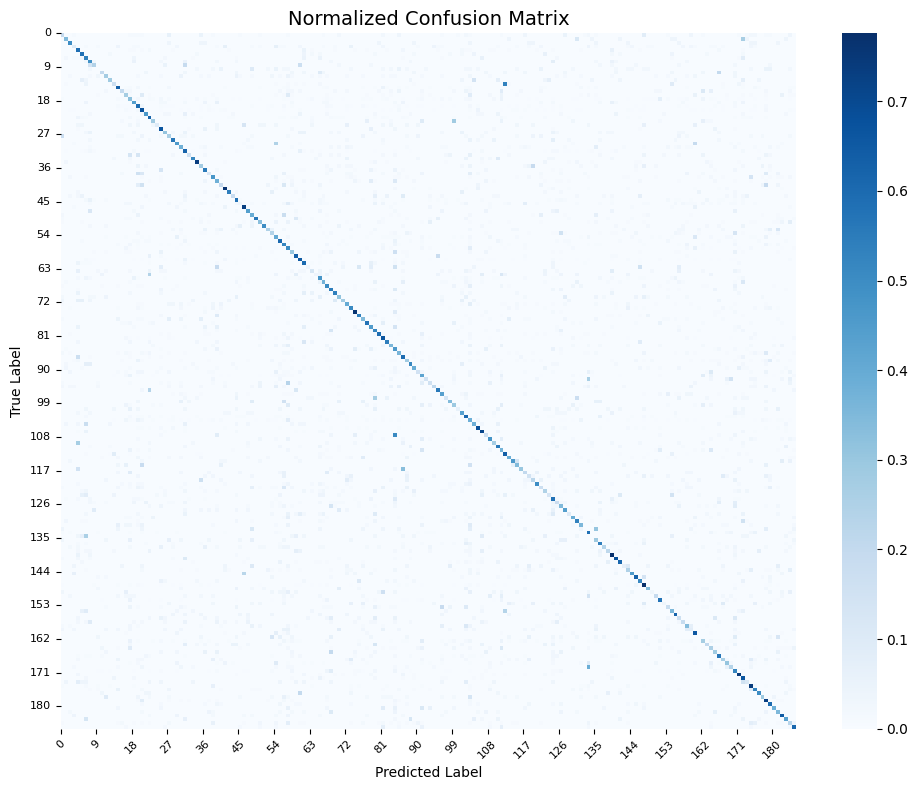

In [11]:
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.heatmap(normalized_confusion_matrix, annot=False, cmap='Blues', cbar=True)

# Show fewer labels on axes (every 10th label, for example)
num_classes = confusion_matrix.shape[0]
ticks = range(0, num_classes, max(1, num_classes // 20))  # Adjust frequency based on matrix size
plt.xticks(ticks, ticks, rotation=45, fontsize=8)  # Smaller font size for clarity
plt.yticks(ticks, ticks, fontsize=8)

plt.title("Normalized Confusion Matrix", fontsize=14)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

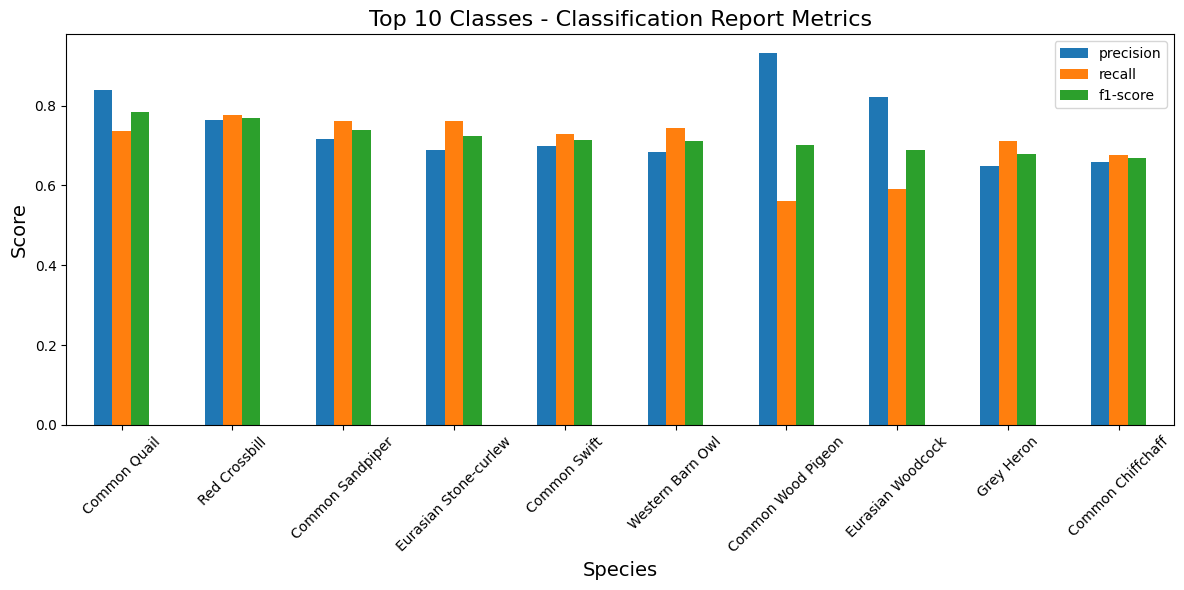

In [13]:
# Sort classes by support and take the top 10 (or any number you prefer)
top_classes = df_report.sort_values(by='f1-score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_classes.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Classes - Classification Report Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Species", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

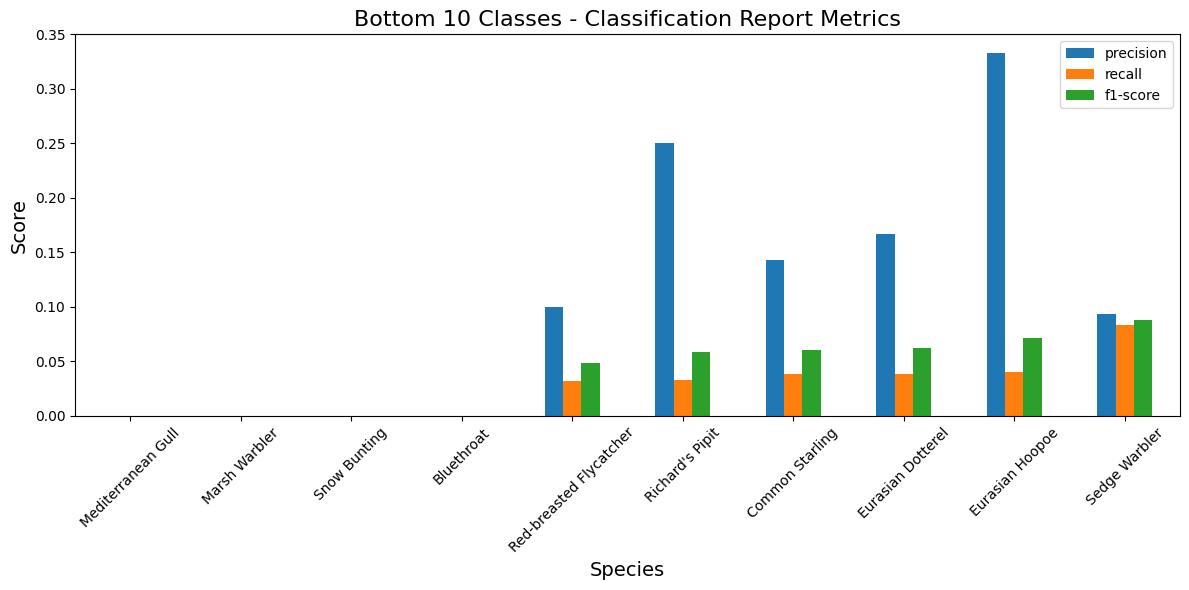

In [15]:
# Sort classes by support and take the bottom 10 (or any number you prefer)
bottom_classes = df_report.sort_values(by='f1-score', ascending=True).head(10)

plt.figure(figsize=(10, 6))
bottom_classes.plot(kind='bar', figsize=(12, 6))
plt.title("Bottom 10 Classes - Classification Report Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Species", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


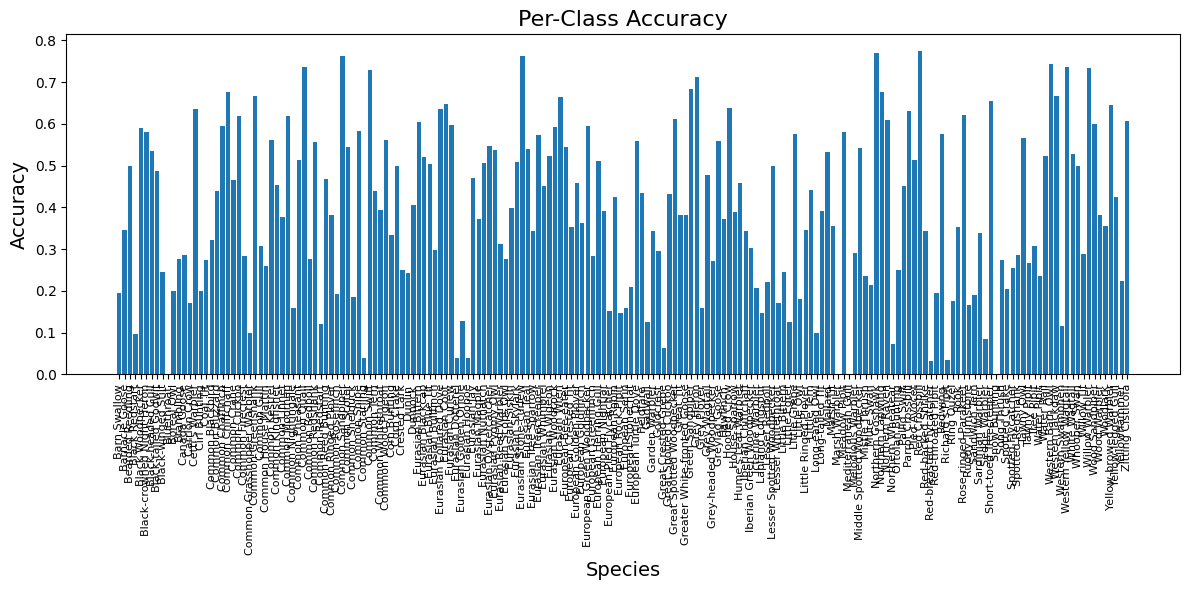

In [17]:
plt.figure(figsize=(12, 6))  # Increase figure size
plt.bar(per_class_accuracy.keys(), per_class_accuracy.values())
plt.title("Per-Class Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Species", fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate labels and reduce font size
plt.tight_layout()
plt.show()

In [2]:
# Sort per-class accuracy and select the top 10
top_per_class_accuracy = dict(sorted(per_class_accuracy.items(), key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(10, 6))
plt.bar(top_per_class_accuracy.keys(), top_per_class_accuracy.values())
plt.title("Top 10 Classes - Per-Class Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Species", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

NameError: name 'per_class_accuracy' is not defined

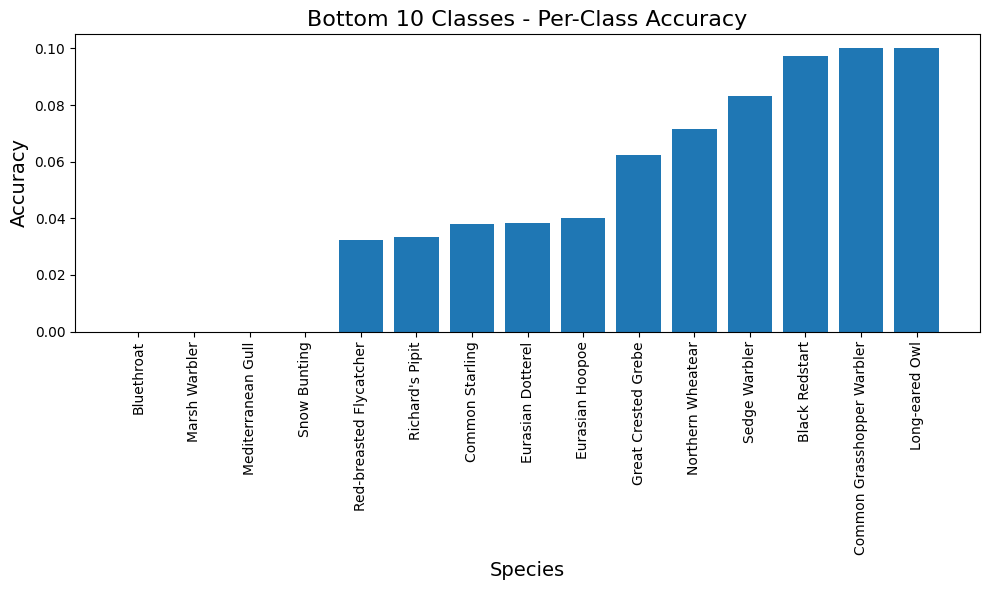

In [28]:
# Sort per-class accuracy and select the bottom 10
bottom_per_class_accuracy = dict(sorted(per_class_accuracy.items(), key=lambda x: x[1])[:15])

plt.figure(figsize=(10, 6))
plt.bar(bottom_per_class_accuracy.keys(), bottom_per_class_accuracy.values())
plt.title("Bottom 10 Classes - Per-Class Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Species", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


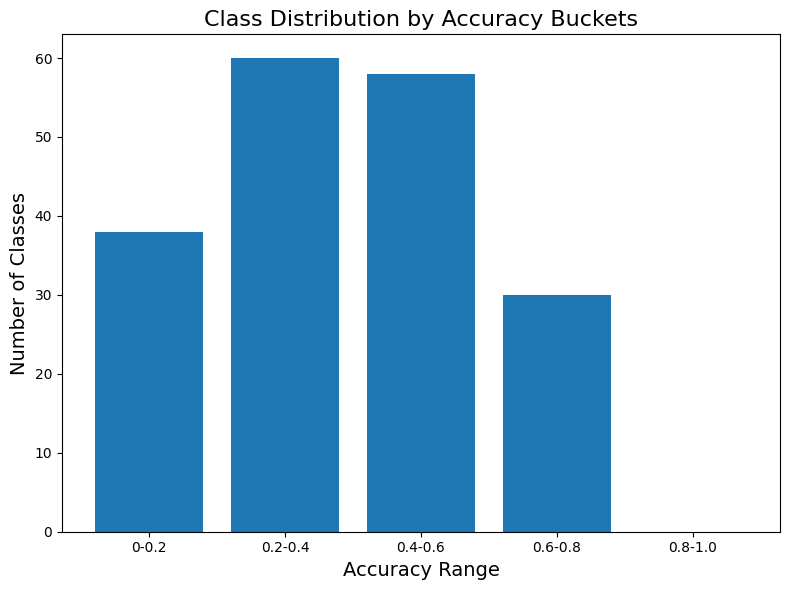

In [23]:
# Group classes by accuracy ranges
accuracy_buckets = {'0-0.2': 0, '0.2-0.4': 0, '0.4-0.6': 0, '0.6-0.8': 0, '0.8-1.0': 0}

for acc in per_class_accuracy.values():
    if acc <= 0.2:
        accuracy_buckets['0-0.2'] += 1
    elif acc <= 0.4:
        accuracy_buckets['0.2-0.4'] += 1
    elif acc <= 0.6:
        accuracy_buckets['0.4-0.6'] += 1
    elif acc <= 0.8:
        accuracy_buckets['0.6-0.8'] += 1
    else:
        accuracy_buckets['0.8-1.0'] += 1

plt.figure(figsize=(8, 6))
plt.bar(accuracy_buckets.keys(), accuracy_buckets.values())
plt.title("Class Distribution by Accuracy Buckets", fontsize=16)
plt.ylabel("Number of Classes", fontsize=14)
plt.xlabel("Accuracy Range", fontsize=14)
plt.tight_layout()
plt.show()


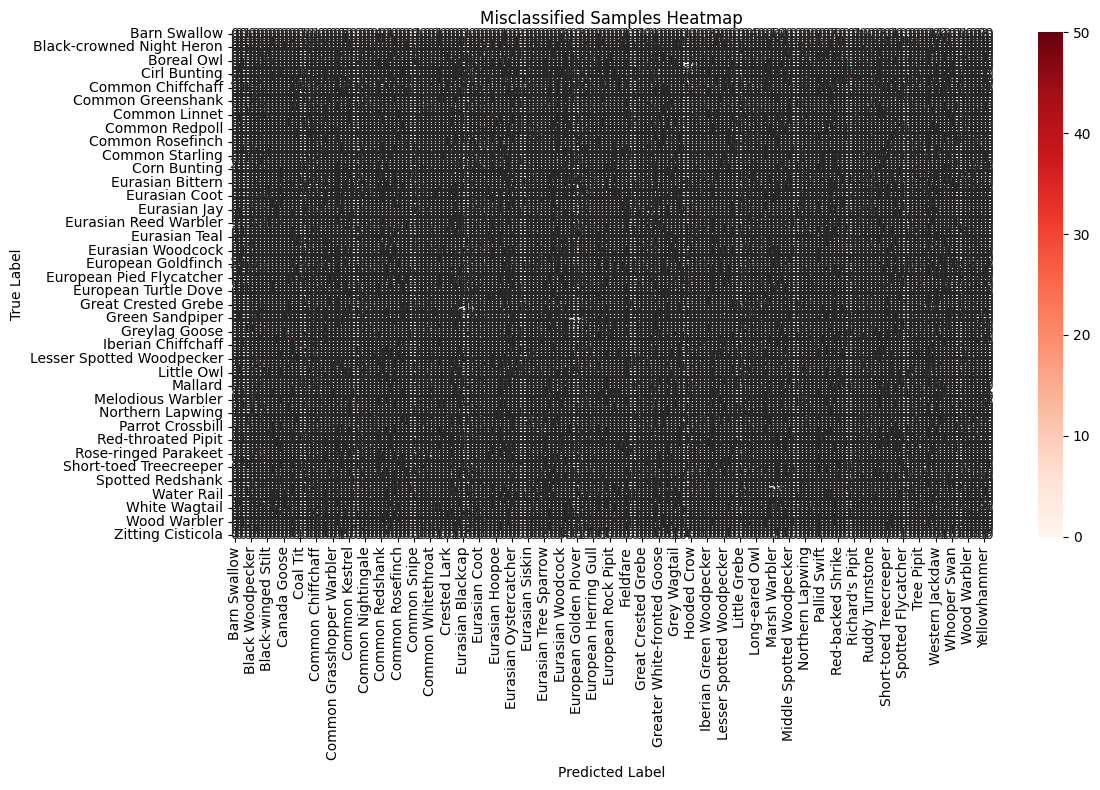

In [31]:
# Extract misclassifications
misclassifications = Counter(
    (sample["true_label"], sample["predicted_label"]) for sample in misclassified_samples
)

# Convert the Counter to a DataFrame
df_misclassifications = pd.DataFrame(
    [(key[0], key[1], value) for key, value in misclassifications.items()],
    columns=["true_label", "predicted_label", "count"]
)

# Pivot the DataFrame to create a heatmap-compatible structure
heatmap_data = df_misclassifications.pivot(index="true_label", columns="predicted_label", values="count").fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds")
plt.title("Misclassified Samples Heatmap")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

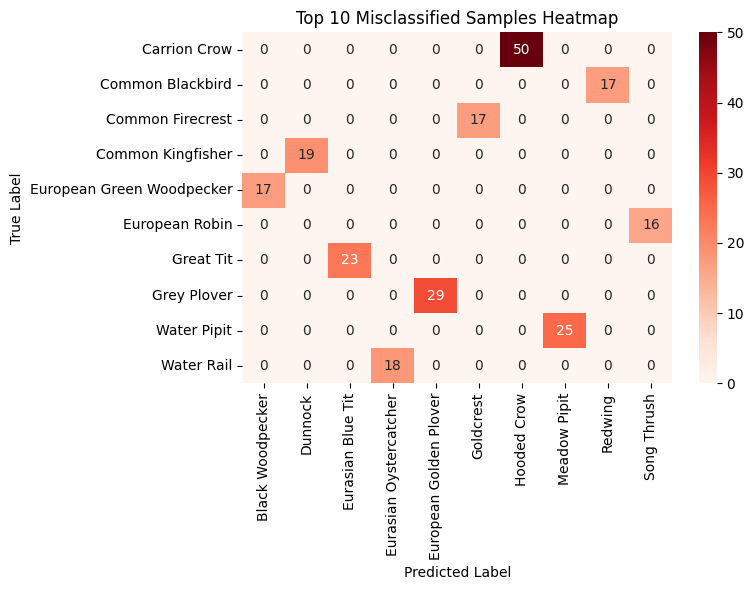

In [32]:
# Filter for the top N misclassifications
top_n = 10  # Adjust this value as needed
df_top_misclassifications = df_misclassifications.nlargest(top_n, "count")

# Pivot the filtered data for the heatmap
heatmap_data_top = df_top_misclassifications.pivot(index="true_label", columns="predicted_label", values="count").fillna(0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_top, annot=True, fmt=".0f", cmap="Reds")
plt.title(f"Top {top_n} Misclassified Samples Heatmap")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


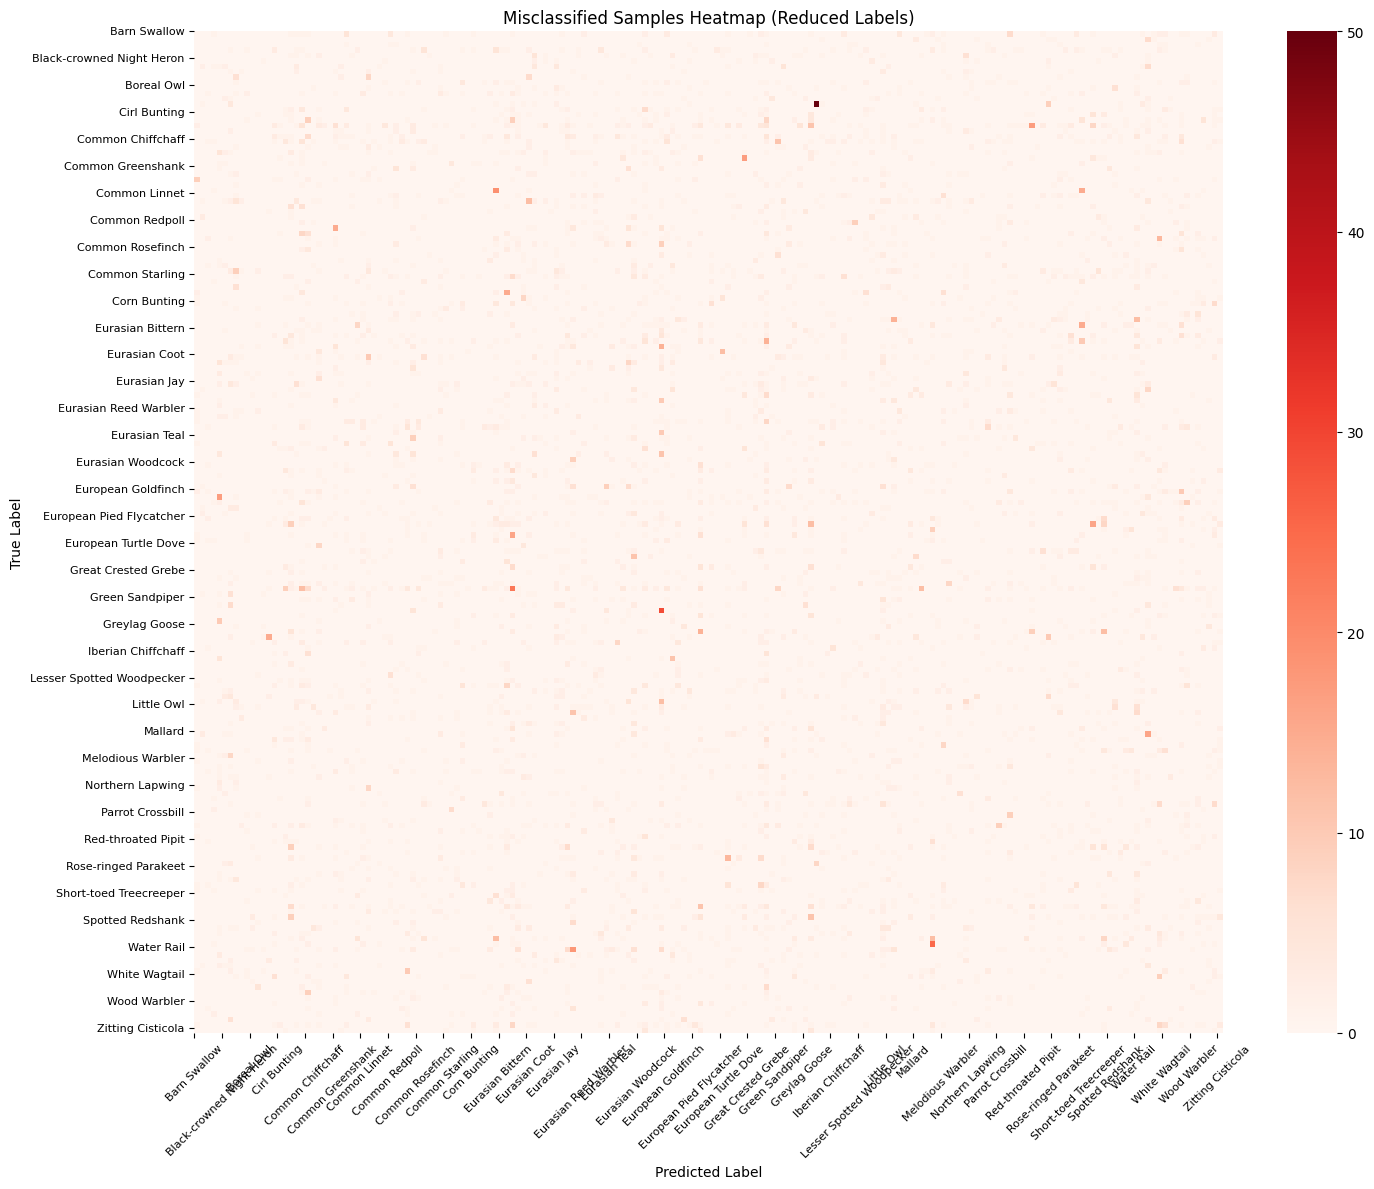

In [33]:
plt.figure(figsize=(15, 12))  # Increase figure size
sns.heatmap(heatmap_data, annot=False, cmap="Reds", cbar=True)

# Show fewer labels on both axes (e.g., every 5th label)
x_ticks = heatmap_data.columns[::5]  # Every 5th predicted label
y_ticks = heatmap_data.index[::5]  # Every 5th true label
plt.xticks(range(0, len(x_ticks) * 5, 5), x_ticks, rotation=45, fontsize=8)
plt.yticks(range(0, len(y_ticks) * 5, 5), y_ticks, fontsize=8)

plt.title("Misclassified Samples Heatmap (Reduced Labels)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


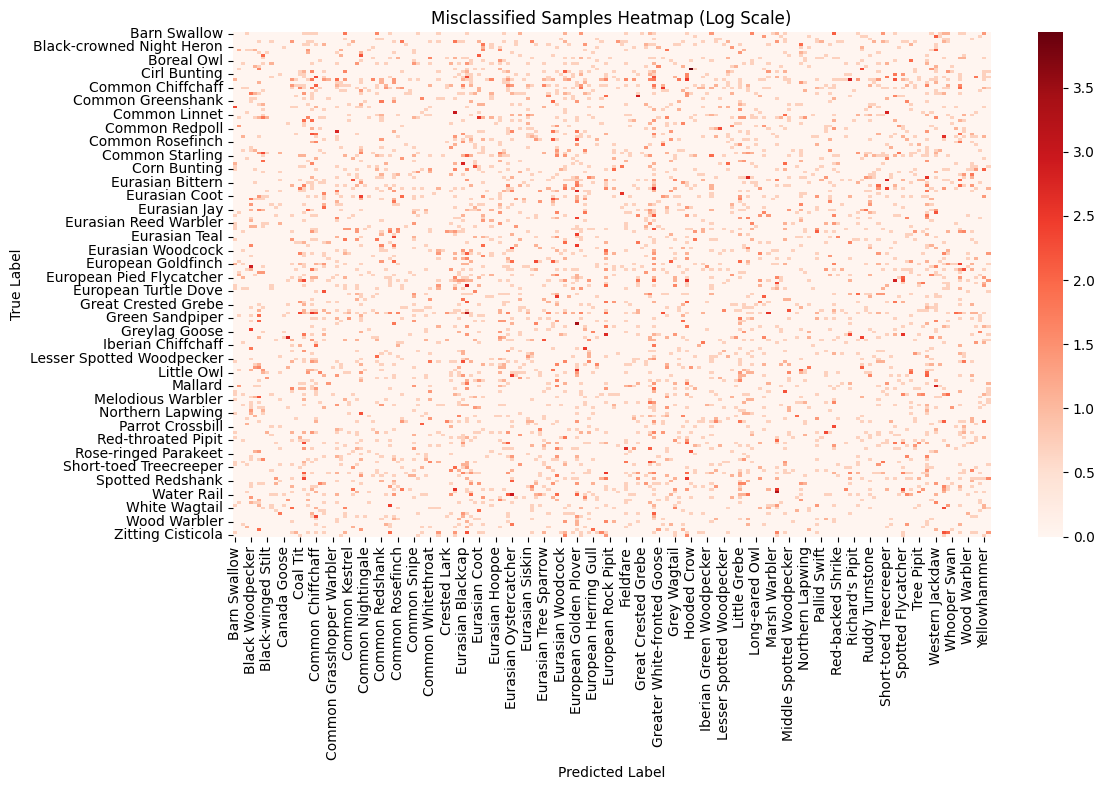

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.log1p(heatmap_data), annot=False, cmap="Reds", cbar=True)  # log1p avoids log(0)
plt.title("Misclassified Samples Heatmap (Log Scale)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


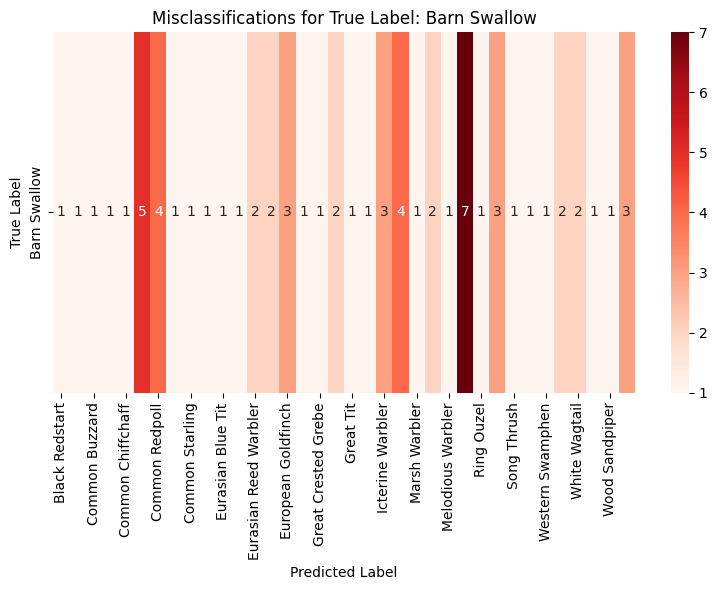

In [35]:
# Focus on specific true or predicted labels (e.g., only misclassifications for "Barn Swallow")
filtered_true_label = "Barn Swallow"
filtered_data = df_misclassifications[df_misclassifications["true_label"] == filtered_true_label]

heatmap_data_filtered = filtered_data.pivot(index="true_label", columns="predicted_label", values="count").fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_filtered, annot=True, fmt=".0f", cmap="Reds")
plt.title(f"Misclassifications for True Label: {filtered_true_label}")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()
